In [1]:
# %matplotlib notebook

import matplotlib
matplotlib.use('nbAgg')

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import UnivariateSpline
import astropy.io.fits as fits
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunkit_instruments import suvi
from scipy import stats
import sunpy.sun.constants as const
from PIL import Image
import matplotlib.colors as colors
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

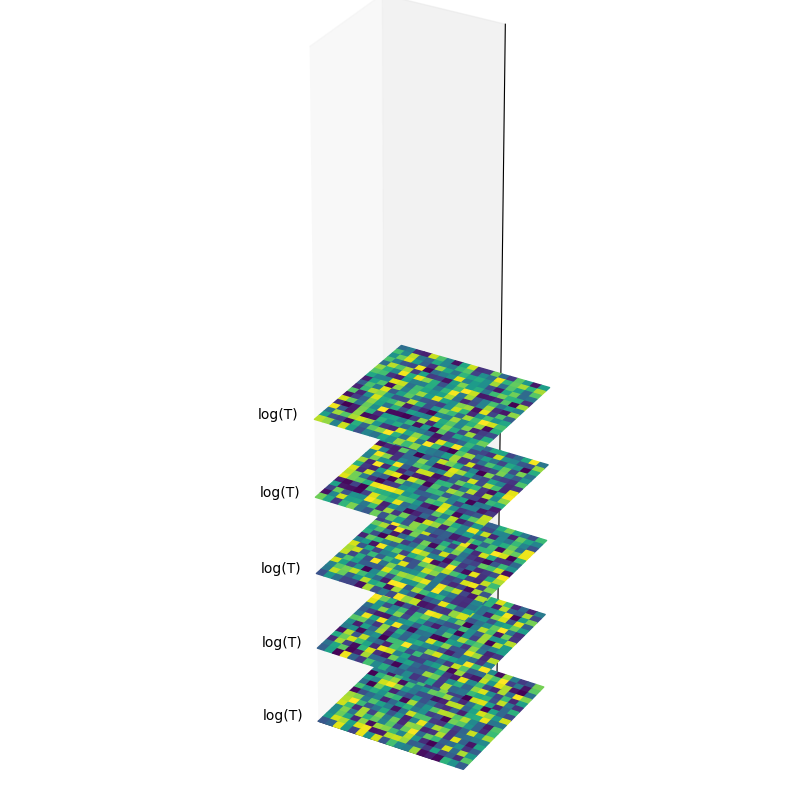

In [81]:
# Function to create random images
def create_random_image(height, width):
    return np.random.rand(height, width)

# Number of images
height, width = 20, 20
titles = ["log(T)", "log(EM)", "AIA 171 A", "Hα", "Ca II K"]
num_images = len(titles)


# Create a list of random images
images = [create_random_image(height, width) for _ in range(num_images)]

# Create 3D plot
fig = plt.figure(figsize=[10,30])
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

# Adjust the spacing between the layers
spacing = 10      # Change this value to adjust spacing
text_spacing = 2  # Spacing between text and layers

# Function to plot an image at a specific layer
def plot_image(ax, img, layer, spacing):
    x, y = np.mgrid[0:img.shape[1], 0:img.shape[0]]
    x = x.T
    y = y.T
    z = np.ones_like(x) * layer * spacing
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(img/img.max()), shade=False)
    return x, y, z

# Plot each random image in its layer
for i, img in enumerate(images):
    x, y, z = plot_image(ax, img, i, spacing)
    # ax.text(x.shape[1], y.shape[0]//2, i*spacing, f'Layer {i + 1}', color='black')
    ax.text(x[0,0] - text_spacing, y[0,0], i * spacing, f'{titles[0]}', color='black', fontsize=10, ha='right', va='center')


# Set labels and view angle
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Layer')
ax.view_init(elev=30, azim=-60)  # Adjust the elevation and azimuth to get a better view

limits = 15
ax.set_xlim(0, limits)
ax.set_ylim(0, limits)
ax.set_zlim(0, limits*num_images + spacing)
ax.set_box_aspect([limits, limits, limits*num_images])
# ax.set_box_aspect([1, 1, (limits*num_images + spacing) / limits])

# Hide the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

In [74]:
# # Set aspect ratio and limits
# limits = 20
# ax.set_xlim(0, limits)
# ax.set_ylim(0, limits)
# ax.set_zlim(0, limits * num_images + spacing)
# ax.set_box_aspect([1, 1, (limits * num_images + spacing) / limits])

# # Hide the axes
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
from sunpy.net import Fido, attrs as a
import sunpy.map
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from sunpy.coordinates import frames, get_body_heliographic_stonyhurst, get_horizons_coord

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [2]:
YEAR = '2024'
MONTH = '05'
DAY = '14'
start_hour = '16'
end_hour = '23'
start_minute = '00'
end_minute = '59'

In [3]:
# result = Fido.search(a.Time(f'{YEAR}-{MONTH}-{DAY} {start_hour}:{start_minute}',
#                             f'{YEAR}-{MONTH}-{DAY} {end_hour}:{end_minute}'),
#                             a.Instrument('SECCHI'), 
#                             # a.Detector('C2'),
#                             # a.Sample(1*u.min)
# )

In [6]:
# print(result)

In [7]:
import hvpy
from sunpy.time import parse_time
# from sunpy.util.config import get_and_create_download_dir
# print(get_and_create_download_dir())

In [8]:
dirpath = '/home/mnedal/data'

try:
    os.makedirs(f'{dirpath}/COR2_A/', exist_ok=True)
except:
    pass

In [131]:
file = hvpy.save_file(hvpy.getJP2Image(parse_time('2014/05/15 07:54').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/COR2_A/COR2.jp2')
map_obj = sunpy.map.Map(file)

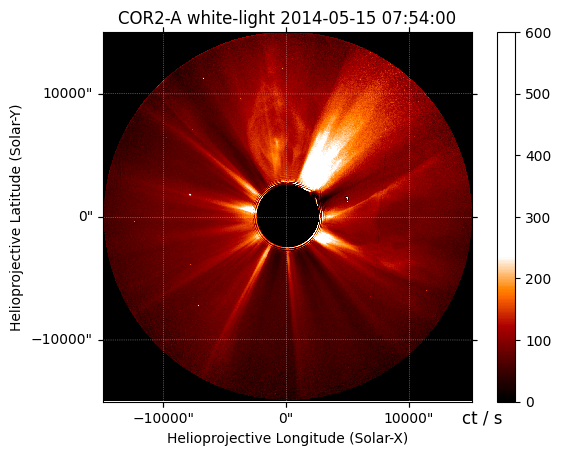

In [139]:
cor2_map.peek(vmin=0, vmax=6e2)

In [188]:
start_hour = '16'
start_minute = '30'

file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR2_A.value),
                           f'{dirpath}/COR2_A/COR2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
map_obj = sunpy.map.Map(file)

<IPython.core.display.Javascript object>


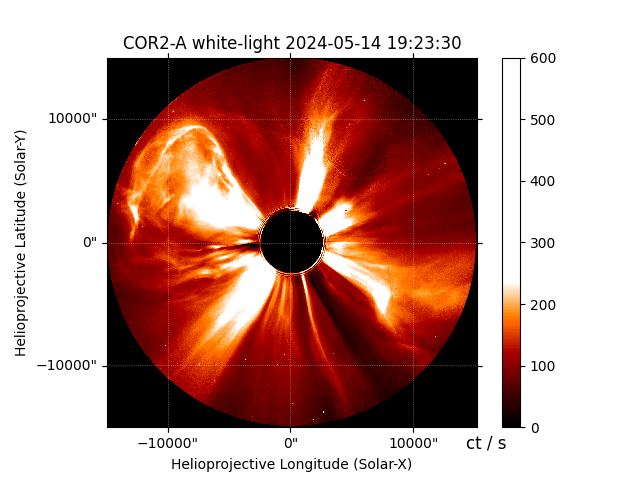

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [189]:
cor2_map.peek(vmin=0, vmax=6e2)

<IPython.core.display.Javascript object>


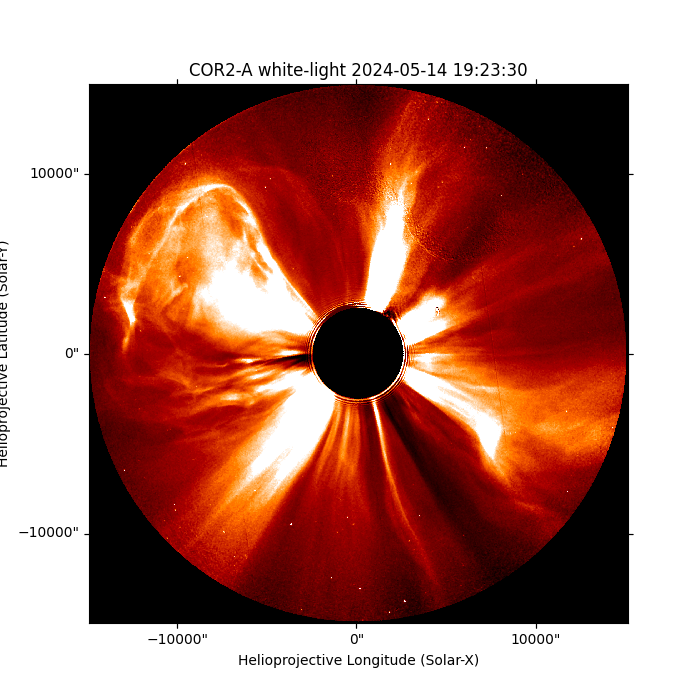

In [190]:
from astropy.visualization import ImageNormalize


min_range = 0
max_range = 6e2
cor2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor2_map)
cor2_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [11]:
from datetime import datetime, timedelta

In [12]:
# COR1_A, COR2_A, LASCO_C2, LASCO_C3
instrument = 'COR1_A'

try:
    os.makedirs(f'{dirpath}/{instrument}/', exist_ok=True)
except:
    pass

# Define the start and end datetimes
start_datetime = datetime(2024, 5, 14, 16, 30)
end_datetime = datetime(2024, 5, 14, 23, 59)

# Generate the list of datetimes using list comprehension
datetimes = [start_datetime + timedelta(minutes=x) for x in range(int((end_datetime - start_datetime).total_seconds() / 60) + 1)]

for date in datetimes:
    YEAR, MONTH, DAY = str(date).split(' ')[0].split('-')
    start_hour, start_minute, _ = str(date).split(' ')[1].split(':')
    output_filename = f'{instrument}_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2'
    
    if not os.path.exists(f'{dirpath}/{instrument}/{output_filename}'):
        data = hvpy.getJP2Image(parse_time(date).datetime,
                                hvpy.DataSource[f'{instrument}'].value)
        file = hvpy.save_file(data, f'{dirpath}/{instrument}/{output_filename}', overwrite=True)
        print(f'Exported: {output_filename}')
    else:
        print(f'File exists: {output_filename}')

Exported: COR1_A_20240514T1630.jp2
Exported: COR1_A_20240514T1631.jp2
Exported: COR1_A_20240514T1632.jp2
Exported: COR1_A_20240514T1633.jp2
Exported: COR1_A_20240514T1634.jp2
Exported: COR1_A_20240514T1635.jp2
Exported: COR1_A_20240514T1636.jp2
Exported: COR1_A_20240514T1637.jp2
Exported: COR1_A_20240514T1638.jp2
Exported: COR1_A_20240514T1639.jp2
Exported: COR1_A_20240514T1640.jp2
Exported: COR1_A_20240514T1641.jp2
Exported: COR1_A_20240514T1642.jp2
Exported: COR1_A_20240514T1643.jp2
Exported: COR1_A_20240514T1644.jp2
Exported: COR1_A_20240514T1645.jp2
Exported: COR1_A_20240514T1646.jp2
Exported: COR1_A_20240514T1647.jp2
Exported: COR1_A_20240514T1648.jp2
Exported: COR1_A_20240514T1649.jp2
Exported: COR1_A_20240514T1650.jp2
Exported: COR1_A_20240514T1651.jp2
Exported: COR1_A_20240514T1652.jp2
Exported: COR1_A_20240514T1653.jp2
Exported: COR1_A_20240514T1654.jp2
Exported: COR1_A_20240514T1655.jp2
Exported: COR1_A_20240514T1656.jp2
Exported: COR1_A_20240514T1657.jp2
Exported: COR1_A_202

Exported: LASCO_C3_20240514T1448.jp2
Exported: LASCO_C3_20240514T1449.jp2
Exported: LASCO_C3_20240514T1450.jp2
Exported: LASCO_C3_20240514T1451.jp2
Exported: LASCO_C3_20240514T1452.jp2
Exported: LASCO_C3_20240514T1453.jp2
Exported: LASCO_C3_20240514T1454.jp2
Exported: LASCO_C3_20240514T1455.jp2
Exported: LASCO_C3_20240514T1456.jp2
Exported: LASCO_C3_20240514T1457.jp2
Exported: LASCO_C3_20240514T1458.jp2
Exported: LASCO_C3_20240514T1459.jp2
Exported: LASCO_C3_20240514T1500.jp2
Exported: LASCO_C3_20240514T1501.jp2
Exported: LASCO_C3_20240514T1502.jp2
Exported: LASCO_C3_20240514T1503.jp2
Exported: LASCO_C3_20240514T1504.jp2
Exported: LASCO_C3_20240514T1505.jp2
Exported: LASCO_C3_20240514T1506.jp2
Exported: LASCO_C3_20240514T1507.jp2
Exported: LASCO_C3_20240514T1508.jp2
Exported: LASCO_C3_20240514T1509.jp2
Exported: LASCO_C3_20240514T1510.jp2
Exported: LASCO_C3_20240514T1511.jp2
Exported: LASCO_C3_20240514T1512.jp2
Exported: LASCO_C3_20240514T1513.jp2
Exported: LASCO_C3_20240514T1514.jp2
E

Exported: LASCO_C3_20240514T1830.jp2
Exported: LASCO_C3_20240514T1831.jp2
Exported: LASCO_C3_20240514T1832.jp2
Exported: LASCO_C3_20240514T1833.jp2
Exported: LASCO_C3_20240514T1834.jp2
Exported: LASCO_C3_20240514T1835.jp2
Exported: LASCO_C3_20240514T1836.jp2
Exported: LASCO_C3_20240514T1837.jp2
Exported: LASCO_C3_20240514T1838.jp2
Exported: LASCO_C3_20240514T1839.jp2
Exported: LASCO_C3_20240514T1840.jp2
Exported: LASCO_C3_20240514T1841.jp2
Exported: LASCO_C3_20240514T1842.jp2
Exported: LASCO_C3_20240514T1843.jp2
Exported: LASCO_C3_20240514T1844.jp2
Exported: LASCO_C3_20240514T1845.jp2
Exported: LASCO_C3_20240514T1846.jp2
Exported: LASCO_C3_20240514T1847.jp2
Exported: LASCO_C3_20240514T1848.jp2
Exported: LASCO_C3_20240514T1849.jp2
Exported: LASCO_C3_20240514T1850.jp2
Exported: LASCO_C3_20240514T1851.jp2
Exported: LASCO_C3_20240514T1852.jp2
Exported: LASCO_C3_20240514T1853.jp2
Exported: LASCO_C3_20240514T1854.jp2
Exported: LASCO_C3_20240514T1855.jp2
Exported: LASCO_C3_20240514T1856.jp2
E

Exported: LASCO_C3_20240514T2212.jp2
Exported: LASCO_C3_20240514T2213.jp2
Exported: LASCO_C3_20240514T2214.jp2
Exported: LASCO_C3_20240514T2215.jp2
Exported: LASCO_C3_20240514T2216.jp2
Exported: LASCO_C3_20240514T2217.jp2
Exported: LASCO_C3_20240514T2218.jp2
Exported: LASCO_C3_20240514T2219.jp2
Exported: LASCO_C3_20240514T2220.jp2
Exported: LASCO_C3_20240514T2221.jp2
Exported: LASCO_C3_20240514T2222.jp2
Exported: LASCO_C3_20240514T2223.jp2
Exported: LASCO_C3_20240514T2224.jp2
Exported: LASCO_C3_20240514T2225.jp2
Exported: LASCO_C3_20240514T2226.jp2
Exported: LASCO_C3_20240514T2227.jp2
Exported: LASCO_C3_20240514T2228.jp2
Exported: LASCO_C3_20240514T2229.jp2
Exported: LASCO_C3_20240514T2230.jp2
Exported: LASCO_C3_20240514T2231.jp2
Exported: LASCO_C3_20240514T2232.jp2
Exported: LASCO_C3_20240514T2233.jp2
Exported: LASCO_C3_20240514T2234.jp2
Exported: LASCO_C3_20240514T2235.jp2
Exported: LASCO_C3_20240514T2236.jp2
Exported: LASCO_C3_20240514T2237.jp2
Exported: LASCO_C3_20240514T2238.jp2
E

In [13]:
import glob

jp_files =sorted(glob.glob(f'{dirpath}/{instrument}/{instrument}_{YEAR}{MONTH}{DAY}*.jp2'))
len(jp_files)

450

<IPython.core.display.Javascript object>


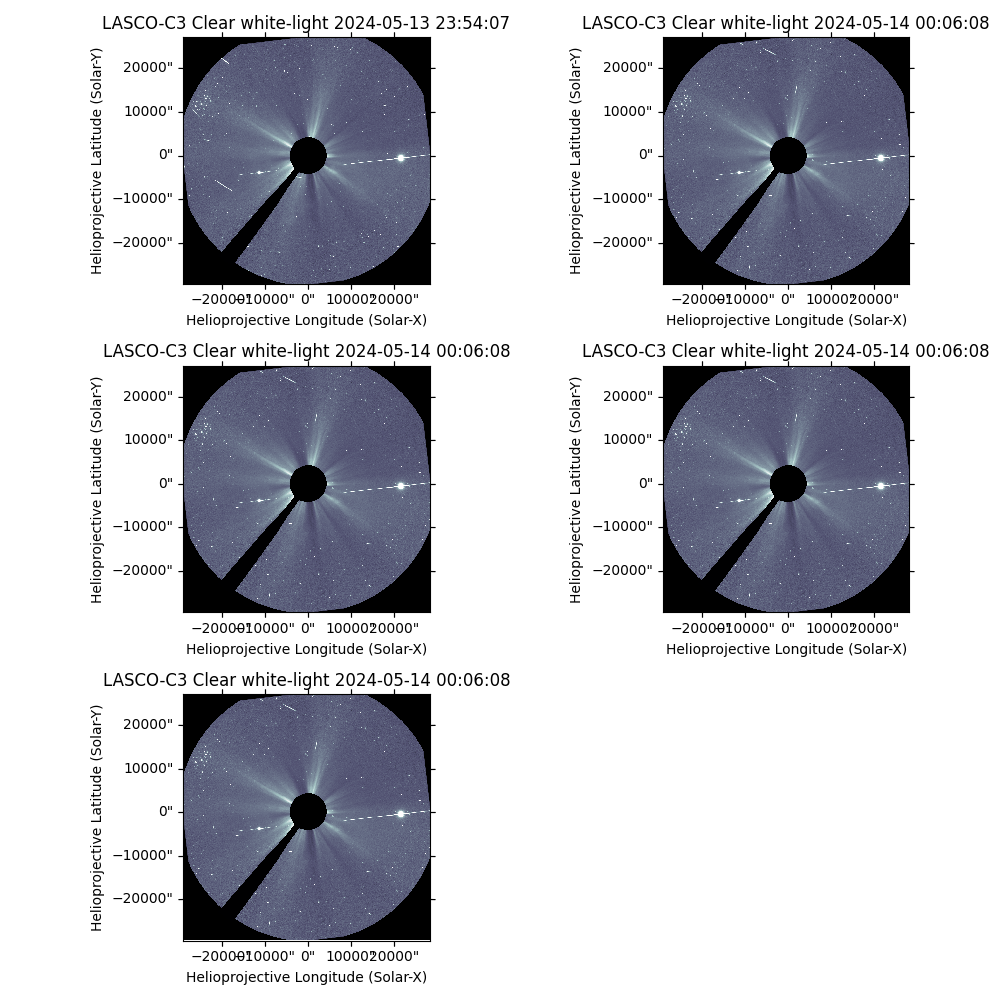

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [323]:
fig = plt.figure(figsize=[10,10])

for i, file in enumerate(jp_files[:5]):
    jp_map = sunpy.map.Map(file)
    jp_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=2.5e2)
    
    ax = fig.add_subplot(3,2,i+1, projection=jp_map)
    jp_map.plot(axes=ax)
    ax.grid(False)

fig.tight_layout()
plt.show()

In [313]:
# [x for x in dir(hvpy.DataSource) if not x.startswith('_')]

In [252]:
start_hour = '17'
start_minute = '25'

cor1_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.COR1_A.value),
                           f'{dirpath}/SECCHI/COR1_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
cor1_map = sunpy.map.Map(cor1_file)

<IPython.core.display.Javascript object>


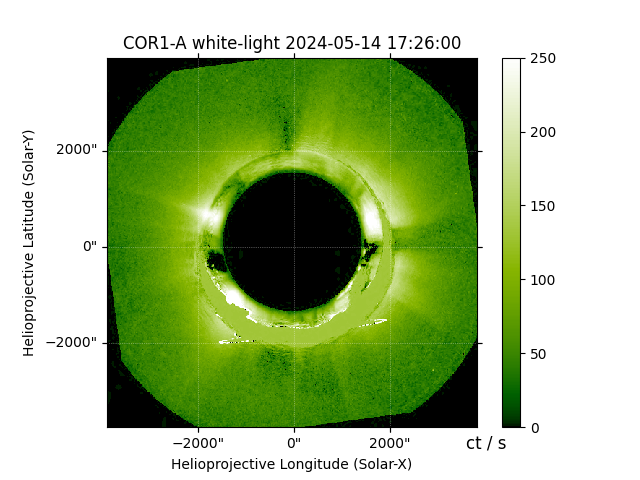

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [253]:
cor1_map.peek(vmin=0, vmax=2.5e2)

<IPython.core.display.Javascript object>


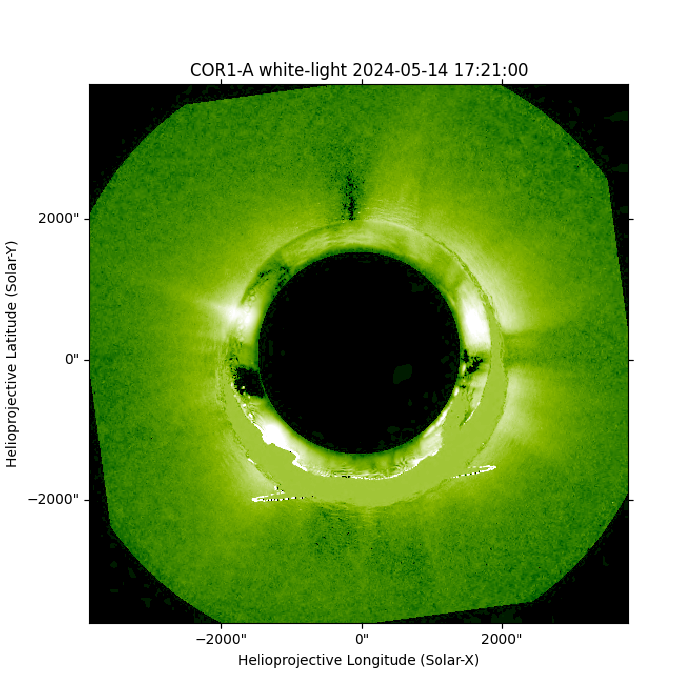

In [245]:
min_range = 0
max_range = 2.5e2
cor1_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=cor1_map)
cor1_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [255]:
23580/3600

6.55

In [254]:
60*60

3600

In [270]:
os.makedirs(f'{dirpath}/LASCO_C2/', exist_ok=True)
os.makedirs(f'{dirpath}/LASCO_C3/', exist_ok=True)

In [266]:
start_hour = '18'
start_minute = '15'

lasco_c2_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C2.value),
                           f'{dirpath}/LASCO_C2/LASCO_C2_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c2_map = sunpy.map.Map(lasco_c2_file)

<IPython.core.display.Javascript object>


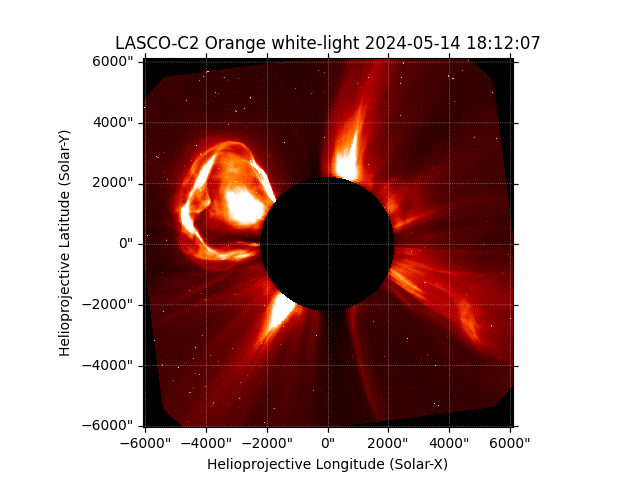

AttributeError: 'int' object has no attribute 'lower'

In [268]:
lasco_c2_map.peek()

<IPython.core.display.Javascript object>


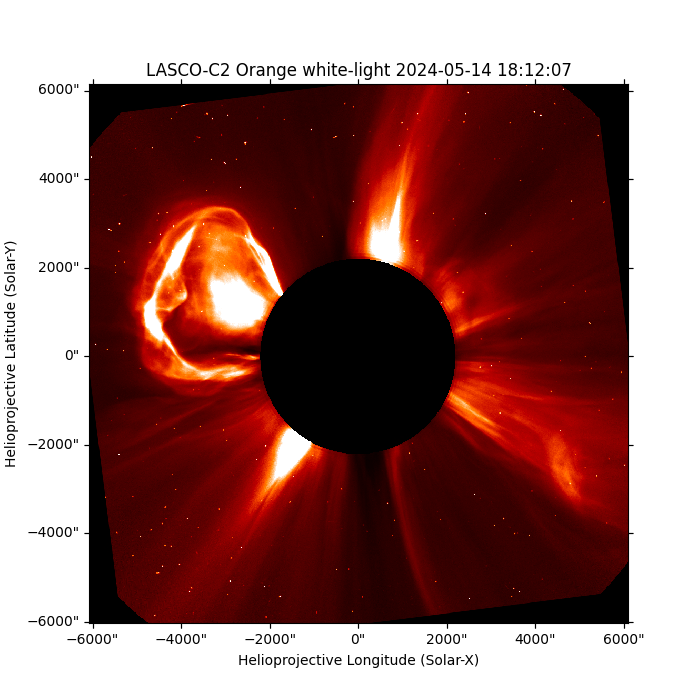

In [269]:
min_range = 0
max_range = 2.5e2
lasco_c2_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c2_map)
lasco_c2_map.plot(axes=ax)
ax.grid(False)
plt.show()

In [278]:
start_hour = '20'
start_minute = '00'

lasco_c3_file = hvpy.save_file(hvpy.getJP2Image(parse_time(f'{YEAR}/{MONTH}/{DAY} {start_hour}:{start_minute}').datetime,
                                            hvpy.DataSource.LASCO_C3.value),
                           f'{dirpath}/LASCO_C3/LASCO_C3_{YEAR}{MONTH}{DAY}T{start_hour}{start_minute}.jp2', overwrite=True)
lasco_c3_map = sunpy.map.Map(lasco_c3_file)

<IPython.core.display.Javascript object>


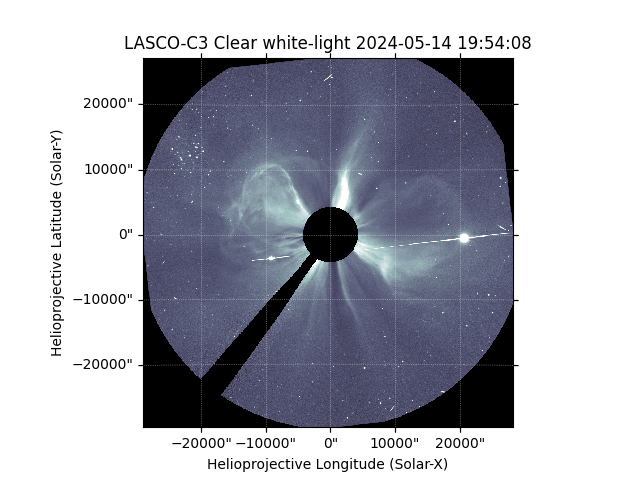

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


AttributeError: 'int' object has no attribute 'lower'

In [279]:
lasco_c3_map.peek()

<IPython.core.display.Javascript object>


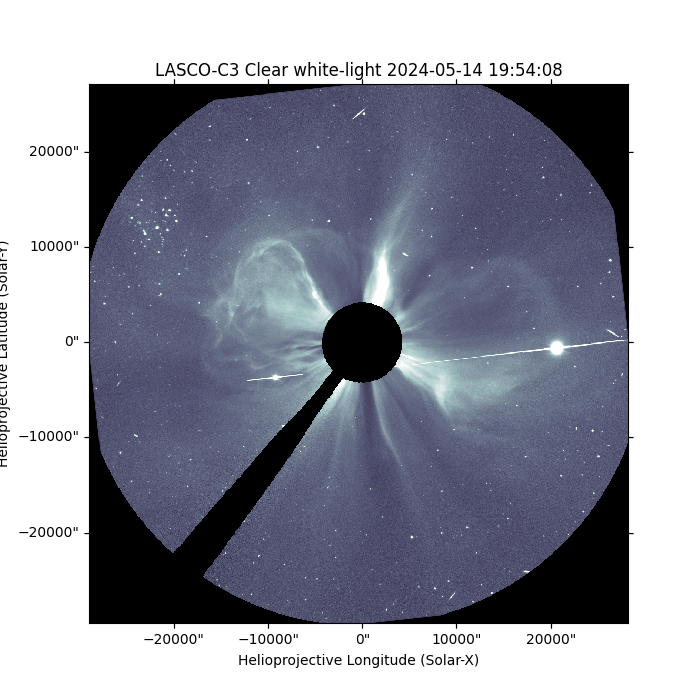

In [280]:
min_range = 0
max_range = 2.5e2
lasco_c3_map.plot_settings['norm'] = ImageNormalize(vmin=min_range, vmax=max_range)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
ax.grid(False)
plt.show()

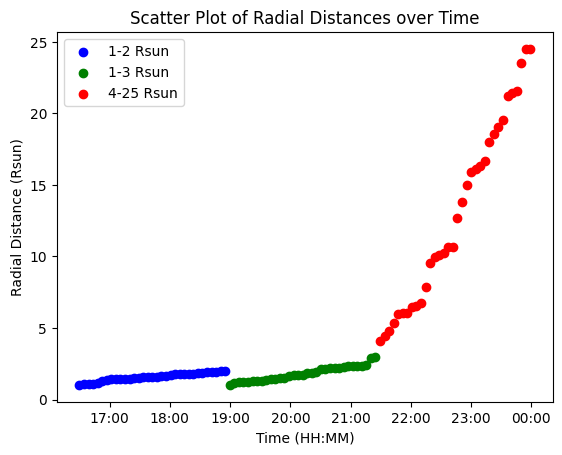

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate random time points
np.random.seed(0)  # For reproducibility
n_points = 100
start_time = datetime(2024, 5, 14, 16, 30)  # Starting point for the time axis
end_time = datetime(2024, 5, 14, 23, 59)  # End point for the time axis
time_points = [start_time + timedelta(minutes=i) for i in np.linspace(0, (end_time-start_time).total_seconds()//60, n_points)]

# Split time points into three sets
time_points_1 = time_points[:n_points//3]
time_points_2 = time_points[n_points//3:2*n_points//3]
time_points_3 = time_points[2*n_points//3:]

# Generate random radial distances with positive trend
radial_distances_1 = np.sort(np.random.uniform(1, 2, len(time_points_1)))
radial_distances_2 = np.sort(np.random.uniform(1, 3, len(time_points_2)))
radial_distances_3 = np.sort(np.random.uniform(4, 25, len(time_points_3)))

fig, ax = plt.subplots()

ax.scatter(time_points_1, radial_distances_1, color='blue', label='1-2 Rsun')
ax.scatter(time_points_2, radial_distances_2, color='green', label='1-3 Rsun')
ax.scatter(time_points_3, radial_distances_3, color='red', label='4-25 Rsun')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Radial Distance (Rsun)')
ax.set_title('Scatter Plot of Radial Distances over Time')
ax.legend()
plt.show()

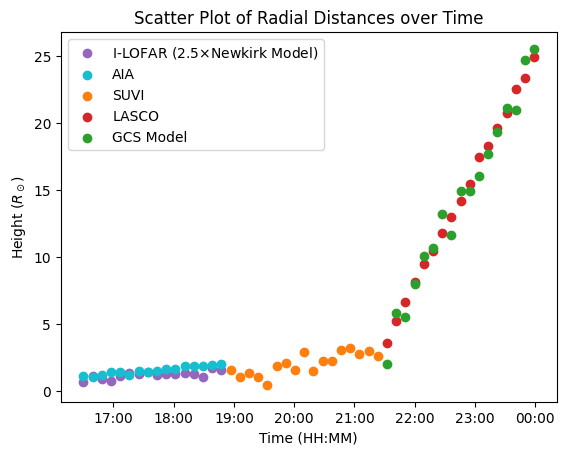

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate random time points
np.random.seed(0)  # For reproducibility
n_points = 50
start_time = datetime(2024, 5, 14, 16, 30)  # Starting point for the time axis
end_time = datetime(2024, 5, 14, 23, 59)  # End point for the time axis
time_points = [start_time + timedelta(minutes=i) for i in np.linspace(0, (end_time-start_time).total_seconds()//60, n_points)]

# Split time points into three main sets
time_points_1 = time_points[:n_points//3]
time_points_2 = time_points[n_points//3:2*n_points//3]
time_points_3 = time_points[2*n_points//3:]

# Slope for radial distances
slope = 0.1

# Generate radial distances with a linear trend and some noise
radial_distances_1 = np.linspace(1, 2, len(time_points_1)) + np.random.normal(0, 0.1, len(time_points_1))
radial_distances_2 = np.linspace(1, 3, len(time_points_2)) + np.random.normal(0, 0.4, len(time_points_2))
radial_distances_3 = np.linspace(4, 25, len(time_points_3)) + np.random.normal(0, 0.2, len(time_points_3))

time_points_4 = time_points_1
radial_distances_4 = np.linspace(1, 1.7, len(time_points_4)) + np.random.normal(0, 0.3, len(time_points_4))

time_points_5 = time_points_3
radial_distances_5 = np.linspace(4, 25, len(time_points_5)) + np.random.normal(0, 1.2, len(time_points_5))

# Plotting
fig, ax = plt.subplots()

ax.scatter(time_points_4, radial_distances_4, color='tab:purple', label=r'I-LOFAR (2.5$\times$Newkirk Model)')
ax.scatter(time_points_1, radial_distances_1, color='tab:cyan', label='AIA')
ax.scatter(time_points_2, radial_distances_2, color='tab:orange', label='SUVI')
ax.scatter(time_points_3, radial_distances_3, color='tab:red', label='LASCO')
ax.scatter(time_points_5, radial_distances_5, color='tab:green', label='GCS Model')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.set_title('Scatter Plot of Radial Distances over Time')
ax.legend()
plt.show()

In [90]:
# Test with real points
df_jplot_suvi_cme2_s1 = pd.read_csv('./jplot_suvi_cme2_slit1.csv')
df_jplot_suvi_cme2_s2 = pd.read_csv('./jplot_suvi_cme2_slit2.csv')
df_jplot_suvi_cme2_s3 = pd.read_csv('./jplot_suvi_cme2_slit3.csv')

df_jplot_c2_cme2_s1 = pd.read_csv('./jplot_c2_cme2_slit1.csv')
df_jplot_c2_cme2_s2 = pd.read_csv('./jplot_c2_cme2_slit2.csv')
df_jplot_c2_cme2_s3 = pd.read_csv('./jplot_c2_cme2_slit3.csv')

df_jplot_c3_cme2_s1 = pd.read_csv('./jplot_c3_cme2_slit1.csv')
df_jplot_c3_cme2_s2 = pd.read_csv('./jplot_c3_cme2_slit2.csv')
df_jplot_c3_cme2_s3 = pd.read_csv('./jplot_c3_cme2_slit3.csv')

In [83]:
df_jplot_c2_cme2_s1

Unnamed: 0          time    distance1   distance_km  distance_diff_km  \
0           1  19857.754240  1874.103501  1.373936e+06     917698.199024   
1           2  19857.762208  3134.170464  2.297712e+06     923775.670541   
2           3  19857.770735  4004.611459  2.935846e+06     638134.509255   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 18:06:06.376276+00:00   797.108571  1151.283818  
1  2024-05-14 18:17:34.788223+00:00   688.411947  1341.893723  
2  2024-05-14 18:29:51.509780+00:00   736.721557   866.181399

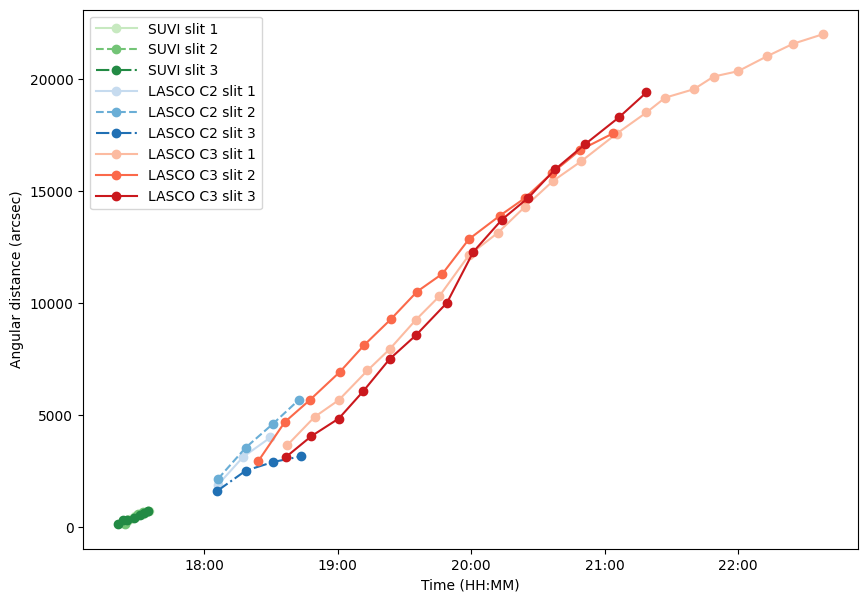

In [97]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)

# Generate gradient colors
cmap1 = plt.get_cmap('Greens')
cmap2 = plt.get_cmap('Blues')
cmap3 = plt.get_cmap('Reds')

# make 3 evenly spaced colors from the colormaps
colors1 = [cmap1(i / 4) for i in range(1, 4)]
colors2 = [cmap2(i / 4) for i in range(1, 4)]
colors3 = [cmap3(i / 4) for i in range(1, 4)]

# Plotting with gradient colors
ax.plot(df_jplot_suvi_cme2_s1['time'], df_jplot_suvi_cme2_s1['distance1'], 'o-', label='SUVI slit 1', color=colors1[0])
ax.plot(df_jplot_suvi_cme2_s2['time'], df_jplot_suvi_cme2_s2['distance2'], 'o--', label='SUVI slit 2', color=colors1[1])
ax.plot(df_jplot_suvi_cme2_s3['time'], df_jplot_suvi_cme2_s3['distance3'], 'o-.', label='SUVI slit 3', color=colors1[2])

ax.plot(df_jplot_c2_cme2_s1['time'], df_jplot_c2_cme2_s1['distance1'], 'o-', label='LASCO C2 slit 1', color=colors2[0])
ax.plot(df_jplot_c2_cme2_s2['time'], df_jplot_c2_cme2_s2['distance2'], 'o--', label='LASCO C2 slit 2', color=colors2[1])
ax.plot(df_jplot_c2_cme2_s3['time'], df_jplot_c2_cme2_s3['distance3'], 'o-.', label='LASCO C2 slit 3', color=colors2[2])

ax.plot(df_jplot_c3_cme2_s1['time'], df_jplot_c3_cme2_s1['distance1'], 'o-', label='LASCO C3 slit 1', color=colors3[0])
ax.plot(df_jplot_c3_cme2_s2['time'], df_jplot_c3_cme2_s2['distance2'], 'o-', label='LASCO C3 slit 2', color=colors3[1])
ax.plot(df_jplot_c3_cme2_s3['time'], df_jplot_c3_cme2_s3['distance3'], 'o-', label='LASCO C3 slit 3', color=colors3[2])

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Angular distance (arcsec)')
ax.legend(handlelength=3)
plt.show()

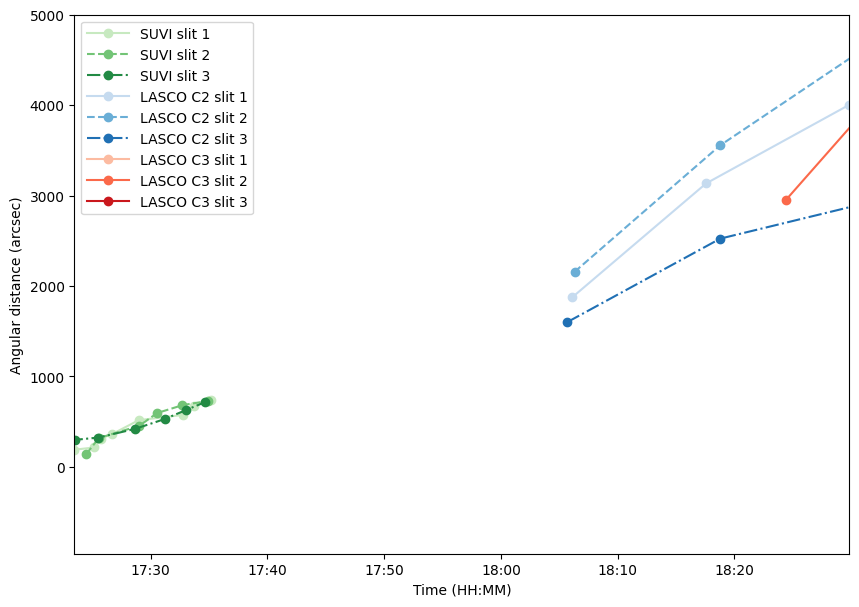

In [103]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)

# Generate gradient colors
cmap1 = plt.get_cmap('Greens')
cmap2 = plt.get_cmap('Blues')
cmap3 = plt.get_cmap('Reds')

# make 3 evenly spaced colors from the colormaps
colors1 = [cmap1(i / 4) for i in range(1, 4)]
colors2 = [cmap2(i / 4) for i in range(1, 4)]
colors3 = [cmap3(i / 4) for i in range(1, 4)]

# Plotting with gradient colors
ax.plot(df_jplot_suvi_cme2_s1['time'], df_jplot_suvi_cme2_s1['distance1'], 'o-', label='SUVI slit 1', color=colors1[0])
ax.plot(df_jplot_suvi_cme2_s2['time'], df_jplot_suvi_cme2_s2['distance2'], 'o--', label='SUVI slit 2', color=colors1[1])
ax.plot(df_jplot_suvi_cme2_s3['time'], df_jplot_suvi_cme2_s3['distance3'], 'o-.', label='SUVI slit 3', color=colors1[2])

ax.plot(df_jplot_c2_cme2_s1['time'], df_jplot_c2_cme2_s1['distance1'], 'o-', label='LASCO C2 slit 1', color=colors2[0])
ax.plot(df_jplot_c2_cme2_s2['time'], df_jplot_c2_cme2_s2['distance2'], 'o--', label='LASCO C2 slit 2', color=colors2[1])
ax.plot(df_jplot_c2_cme2_s3['time'], df_jplot_c2_cme2_s3['distance3'], 'o-.', label='LASCO C2 slit 3', color=colors2[2])

ax.plot(df_jplot_c3_cme2_s1['time'], df_jplot_c3_cme2_s1['distance1'], 'o-', label='LASCO C3 slit 1', color=colors3[0])
ax.plot(df_jplot_c3_cme2_s2['time'], df_jplot_c3_cme2_s2['distance2'], 'o-', label='LASCO C3 slit 2', color=colors3[1])
ax.plot(df_jplot_c3_cme2_s3['time'], df_jplot_c3_cme2_s3['distance3'], 'o-', label='LASCO C3 slit 3', color=colors3[2])

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(left=df_jplot_suvi_cme2_s1['time'][0], right=df_jplot_c2_cme2_s1['time'][2])
ax.set_ylim(top=5000)
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Angular distance (arcsec)')
ax.legend(handlelength=3)
plt.show()

In [76]:
import warnings
warnings.filterwarnings('ignore')

import glob
import matplotlib.pyplot as plt
from sunkit_instruments import suvi
from astropy.visualization import ImageNormalize, LogStretch
import sunpy
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import Helioprojective

In [77]:
# projecting multiple observations in the same figure

start_time = '2024-05-14T16:30:00'
end_time   = '2024-05-14T23:59:59'

START_DATE, START_TIME = start_time.split('T')
END_DATE, END_TIME = end_time.split('T')

START_YEAR, START_MONTH, START_DAY = START_DATE.split('-')
END_YEAR, END_MONTH, END_DAY = END_DATE.split('-')

START_HOUR, START_MINUTE, START_SECOND = START_TIME.split(':')
END_HOUR, END_MINUTE, END_SECOND = END_TIME.split(':')

data_dir = '/home/mnedal/data'



# suvi
data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_195a = data_195A.index(start_195a_file_to_find)
idx2_195a = data_195A.index(end_195a_file_to_find)
map_objects_195A = data_195A[idx1_195a:idx2_195a]

# lasco c2
data_c2 = sorted(glob.glob(f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}*.jp2'))
start_file_to_find_c2 = f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}{START_MINUTE}.jp2'
end_file_to_find_c2 = f'{data_dir}/LASCO_C2/LASCO_C2_{START_YEAR}{START_MONTH}{START_DAY}T{END_HOUR}{END_MINUTE}.jp2'
idx1_c2 = data_c2.index(start_file_to_find_c2)
idx2_c2 = data_c2.index(end_file_to_find_c2)
map_objects_c2 = data_c2[idx1_c2:idx2_c2]

# lasco c3
data_c3 = sorted(glob.glob(f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}*.jp2'))
start_file_to_find_c3 = f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}{START_MINUTE}.jp2'
end_file_to_find_c3 = f'{data_dir}/LASCO_C3/LASCO_C3_{START_YEAR}{START_MONTH}{START_DAY}T{END_HOUR}{END_MINUTE}.jp2'
idx1_c3 = data_c3.index(start_file_to_find_c3)
idx2_c3 = data_c3.index(end_file_to_find_c3)
map_objects_c3 = data_c3[idx1_c3:idx2_c3]



# suvi_195 = map_objects_195A[2]
# lasco_c2 = map_objects_c2[0]
# lasco_c3 = map_objects_c3[0]

print(len(map_objects_195A), len(map_objects_c2), len(map_objects_c3))
print(suvi_195, lasco_c2, lasco_c3, sep='\n')

30 449 449
/home/mnedal/data/SUVI/20240514/195A/dr_suvi-l2-ci195_g18_s20240514T160800Z_e20240514T161200Z_v1-0-2.fits
/home/mnedal/data/LASCO_C2/LASCO_C2_20240514T1630.jp2
/home/mnedal/data/LASCO_C3/LASCO_C3_20240514T1630.jp2


In [78]:
# suvi_map = suvi.files_to_map(suvi_195, despike_l1b=True)
# suvi_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())

# lasco_c2_map = sunpy.map.Map(lasco_c2)
# lasco_c2_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)

# lasco_c3_map = sunpy.map.Map(lasco_c3)
# lasco_c3_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=200)

In [79]:
def load_lasco_maps(map_objects, detector='C2'):
    # load LASCO C2 or C3 files as sunpy maps
    maps = []
    for m in map_objects:
        map_obj = sunpy.map.Map(m)
        map_obj.meta['bunit'] = 'ct' # a workaround for C2 and C3 jp2 images
        if detector == 'C2':
            map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=250)
        elif detector == 'C3':
            map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=200)
        maps.append(map_obj)
    
    return maps

In [80]:
lasco_c2_maps = load_lasco_maps(map_objects_c2, detector='C2')
lasco_c3_maps = load_lasco_maps(map_objects_c3, detector='C3')

In [81]:
print(len(lasco_c2_maps), len(lasco_c3_maps))

449 449


In [82]:
def remove_redundant_maps(maps):
    '''
    Remove redundant SunPy maps, keeping only one map per unique timestamp.

    Parameters:
    maps (list): List of SunPy Map objects. Each map is expected to have a 'date-obs' 
                 key in its metadata that provides the observation timestamp.

    Returns:
    list: A list of unique SunPy Map objects, one per unique timestamp.
    
    Example:
    >>> unique_maps = remove_redundant_maps(list_of_sunpy_maps)
    '''
    unique_maps = {}
    for m in maps:
        timestamp = m.latex_name
        if timestamp not in unique_maps:
            unique_maps[timestamp] = m
    return list(unique_maps.values())

In [83]:
clean_c2_maps = remove_redundant_maps(lasco_c2_maps)
clean_c3_maps = remove_redundant_maps(lasco_c3_maps)

In [93]:
suvi_195a_maps = []
for file in map_objects_195A:
    m = suvi.files_to_map(file, despike_l1b=True)
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    suvi_195a_maps.append(m)

In [94]:
print(len(suvi_195a_maps), len(clean_c2_maps), len(clean_c3_maps))

30 35 35


In [85]:
suvi_times = []
lasco_c2_times = []
lasco_c3_times = []

for file in map_objects_195A:
    m = suvi.files_to_map(file, despike_l1b=True)
    suvi_times.append(m.meta['date-obs'].split('T')[1])

# for file in map_objects_c2:
#     m = sunpy.map.Map(file)
#     lasco_c2_times.append(m.meta['time_obs'])

# for file in map_objects_c3:
#     m = sunpy.map.Map(file)
#     lasco_c3_times.append(m.meta['time_obs'])

for m in clean_c2_maps:
    lasco_c2_times.append(m.meta['time_obs'])

for m in clean_c3_maps:
    lasco_c3_times.append(m.meta['time_obs'])

In [86]:
suvi_times[:3]

['16:28:49.407', '16:32:49.417', '16:36:49.429']

In [87]:
lasco_c2_times[:3]

['16:24:07.626', '16:36:07.417', '16:48:08.209']

In [88]:
lasco_c3_times[:3]

['16:30:07.422', '16:42:07.514', '16:54:07.404']

In [89]:
# calculate the time cadence of the instruments

from datetime import datetime


# timestamps = suvi_times[:10]
# timestamps = lasco_c2_times[:10]
timestamps = lasco_c3_times[:10]


# Convert string timestamps to datetime objects
time_format = '%H:%M:%S.%f'
datetime_objects = [datetime.strptime(ts, time_format) for ts in timestamps]

# Calculate the differences between consecutive datetime objects
differences = [(datetime_objects[i] - datetime_objects[i-1]).total_seconds() / 60 for i in range(1, len(datetime_objects))]

# Print the differences
for i, diff in enumerate(differences, start=1):
    print(f'Difference between timestamp {i} and {i+1}: {diff:.1f} minutes')

Difference between timestamp 1 and 2: 12.0 minutes
Difference between timestamp 2 and 3: 12.0 minutes
Difference between timestamp 3 and 4: 12.0 minutes
Difference between timestamp 4 and 5: 12.0 minutes
Difference between timestamp 5 and 6: 12.0 minutes
Difference between timestamp 6 and 7: 12.0 minutes
Difference between timestamp 7 and 8: 12.0 minutes
Difference between timestamp 8 and 9: 12.0 minutes
Difference between timestamp 9 and 10: 12.0 minutes


In [95]:
suvi_map = suvi_195a_maps[0]
lasco_c2_map = clean_c2_maps[0]
lasco_c3_map = clean_c3_maps[0]

In [96]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c2_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c2_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [97]:
# fig = plt.figure(figsize=[7,7])
# ax = fig.add_subplot(111, projection=lasco_c2_map)
# lasco_c2_map.plot(axes=ax)
# suvi_reprojected.plot(axes=ax, autoalign=True)
# ax.grid(False)
# plt.show()

In [98]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [99]:
# fig = plt.figure(figsize=[7,7])
# ax = fig.add_subplot(111, projection=lasco_c3_map)
# lasco_c3_map.plot(axes=ax)
# suvi_reprojected.plot(axes=ax, autoalign=True)
# ax.grid(False)
# plt.show()

In [100]:
projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=lasco_c2_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(lasco_c2_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(lasco_c2_map.scale),
                                                 instrument=lasco_c2_map.instrument,
                                                 wavelength=lasco_c2_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(lasco_c2_map.observer_coordinate):
    lasco_c2_reprojected = lasco_c2_map.reproject_to(projected_header)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [101]:
print('suvi:\t', suvi_map.meta['date-obs'].split('T')[1])
print('lasco c2:\t', lasco_c2_map.meta['time_obs'])
print('lasco c3:\t', lasco_c3_map.meta['time_obs'])

suvi:	 16:28:49.407
lasco c2:	 16:24:07.626
lasco c3:	 16:30:07.422


<IPython.core.display.Javascript object>


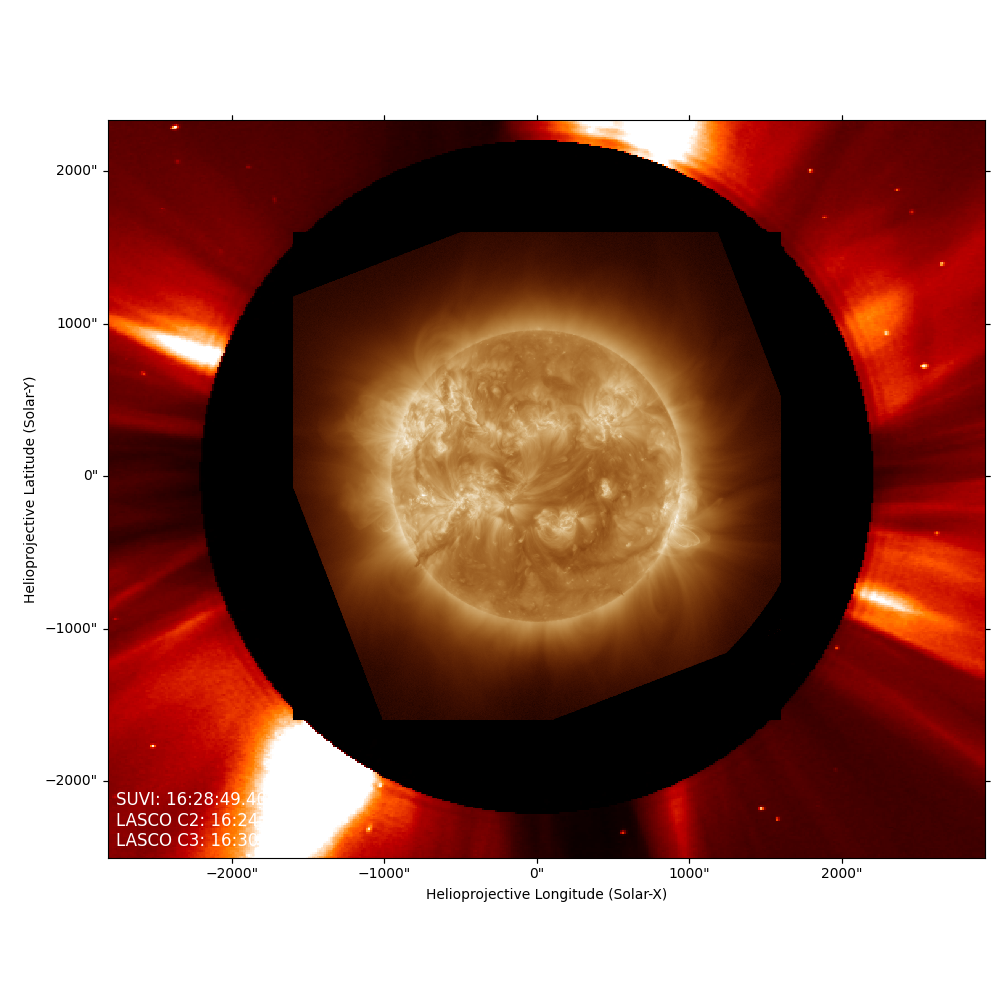

In [103]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
lasco_c2_reprojected.plot(axes=ax, autoalign=True)
suvi_reprojected.plot(axes=ax, autoalign=True)
ax.grid(False)
# ax.set_title(f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}")
ax.set_title(' ')

# Define the title text
title_text = f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}"

# Add the title text to the bottom left of the plot
ax.text(0.01, 0.01, title_text, transform=ax.transAxes, color='white', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
#         bbox=dict(facecolor='white', alpha=0.4))
fig.tight_layout()
plt.show()

### Prep. the running-ratio from SUVI

In [106]:
# read the files names in order
data_171A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/*ci171*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
data_284A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/*ci284*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))

start_171a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/dr_suvi-l2-ci171_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_171a_file_to_find   = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/171A/dr_suvi-l2-ci171_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_171a = data_171A.index(start_171a_file_to_find)
idx2_171a = data_171A.index(end_171a_file_to_find)
map_objects_171A = data_195A[idx1_171a:idx2_171a]

data_195A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/*ci195*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_195a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/195A/dr_suvi-l2-ci195_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_195a = data_195A.index(start_195a_file_to_find)
idx2_195a = data_195A.index(end_195a_file_to_find)
map_objects_195A = data_195A[idx1_195a:idx2_195a]

data_284A = sorted(glob.glob(f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/*ci284*g18*{START_YEAR}{START_MONTH}{START_DAY}*.fits'))
start_284a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/dr_suvi-l2-ci284_g18_s{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}2800Z_e{START_YEAR}{START_MONTH}{START_DAY}T{START_HOUR}3200Z_v1-0-2.fits'
end_284a_file_to_find = f'{data_dir}/SUVI/{START_YEAR}{START_MONTH}{START_DAY}/284A/dr_suvi-l2-ci284_g18_s{START_YEAR}{START_MONTH}{START_DAY}T182800Z_e{START_YEAR}{START_MONTH}{START_DAY}T183200Z_v1-0-2.fits'
idx1_284a = data_284A.index(start_284a_file_to_find)
idx2_284a = data_284A.index(end_284a_file_to_find)
map_objects_284A = data_284A[idx1_284a:idx2_284a]

print(len(map_objects_171A), len(map_objects_195A), len(map_objects_284A))
print(map_objects_171A[0], map_objects_195A[0], map_objects_284A[0], sep='\n')

30 30 30
/home/mnedal/data/SUVI/20240514/195A/dr_suvi-l2-ci195_g18_s20240514T162800Z_e20240514T163200Z_v1-0-2.fits
/home/mnedal/data/SUVI/20240514/195A/dr_suvi-l2-ci195_g18_s20240514T162800Z_e20240514T163200Z_v1-0-2.fits
/home/mnedal/data/SUVI/20240514/284A/dr_suvi-l2-ci284_g18_s20240514T162800Z_e20240514T163200Z_v1-0-2.fits


In [107]:
# load the files as sunpy maps
maps_171A = []
maps_195A = []
maps_284A = []

for m in map_objects_171A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=20, stretch=LogStretch())
    maps_171A.append(map_obj)

for m in map_objects_195A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    maps_195A.append(map_obj)

for m in map_objects_284A:
    map_obj = suvi.files_to_map(m, despike_l1b=True)
    map_obj.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=50, stretch=LogStretch())
    maps_284A.append(map_obj)

In [108]:
clean_maps_171A = remove_redundant_maps(maps_171A)
clean_maps_195A = remove_redundant_maps(maps_195A)
clean_maps_284A = remove_redundant_maps(maps_284A)

print(len(clean_maps_171A), len(clean_maps_195A), len(clean_maps_284A))

30 30 30


In [114]:
# make running-ratio images
def apply_runratio(maps):
    '''
    Apply running-ratio image technique on EUV images.
    See: https://iopscience.iop.org/article/10.1088/0004-637X/750/2/134/pdf
    Inputs: list of EUV sunpy maps.
    Output: sequence of run-ratio sunpy maps.
    '''    
    runratio = [m / prev_m.quantity for m, prev_m in zip(maps[1:], maps[:-1])]
    m_seq_runratio = sunpy.map.Map(runratio, sequence=True)
    
    for m in m_seq_runratio:
        m.data[np.isnan(m.data)] = 1
        m.plot_settings['norm'] = colors.Normalize(vmin=0, vmax=2)
        m.plot_settings['cmap'] = 'seismic'
    
    return m_seq_runratio



def enhance_contrast(image, vmin, vmax):
    '''
    Enhance contrast by clipping and normalization.
    '''
    image_clipped = np.clip(image, vmin, vmax)
    image_normalized = (image_clipped - vmin) / (vmax - vmin)
    return image_normalized



def calculate_percentiles(image, lower_percentile=3, upper_percentile=97):
    '''
    Calculate vmin and vmax based on the 1st and 99th percentiles.
    '''
    vmin = np.percentile(image, lower_percentile)
    vmax = np.percentile(image, upper_percentile)
    return vmin, vmax



def round_obstime(time=None):
    '''
    Round the observation time to put it in the image title.
    Input : str, time (HH:MM:SS.sss)
    Output: str, datetime (YYYY-mm-DD HH:MM:SS)
    '''
    from datetime import datetime, timedelta

    original_time_str = time

    # Convert the original time string to a datetime object
    original_time = datetime.strptime(original_time_str, '%H:%M:%S.%f')

    # Round the time to the nearest second
    rounded_time = original_time + timedelta(seconds=round(original_time.microsecond / 1e6))

    # Format the rounded time as 'HH:MM:SS'
    rounded_time_str = rounded_time.strftime('%H:%M:%S')
    
    return rounded_time_str

In [112]:
# make run-diff maps
m_seq_runratio_171A = apply_runratio(clean_maps_171A)
m_seq_runratio_195A = apply_runratio(clean_maps_195A)
m_seq_runratio_284A = apply_runratio(clean_maps_284A)

print(len(m_seq_runratio_171A), len(m_seq_runratio_195A), len(m_seq_runratio_284A))

29 29 29


In [151]:
suvi_rgb = []

for idx, _ in enumerate(m_seq_runratio_171A):
    
    rgb_image = np.stack([m_seq_runratio_171A[idx].data,
                          m_seq_runratio_195A[idx].data,
                          m_seq_runratio_284A[idx].data],
                         axis=-1)
    
    # Enhance contrast for each channel
    rgb_image_enhanced = np.zeros_like(rgb_image)
    for i in range(3):  # Process each channel independently
        vmin, vmax = calculate_percentiles(rgb_image[..., i])
        rgb_image_enhanced[..., i] = enhance_contrast(rgb_image[..., i], vmin, vmax)
    
    # Convert the 3D array to a 2D array by averaging the channels
    array_2d = np.mean(rgb_image_enhanced, axis=2)
    m = sunpy.map.Map(array_2d, m_seq_runratio_171A[idx].meta)
    suvi_rgb.append(m)

In [152]:
print(len(suvi_rgb))

29


In [175]:
for m in suvi_rgb:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
#     m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=10, stretch=LogStretch())
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=3, stretch=SqrtStretch())

<IPython.core.display.Javascript object>


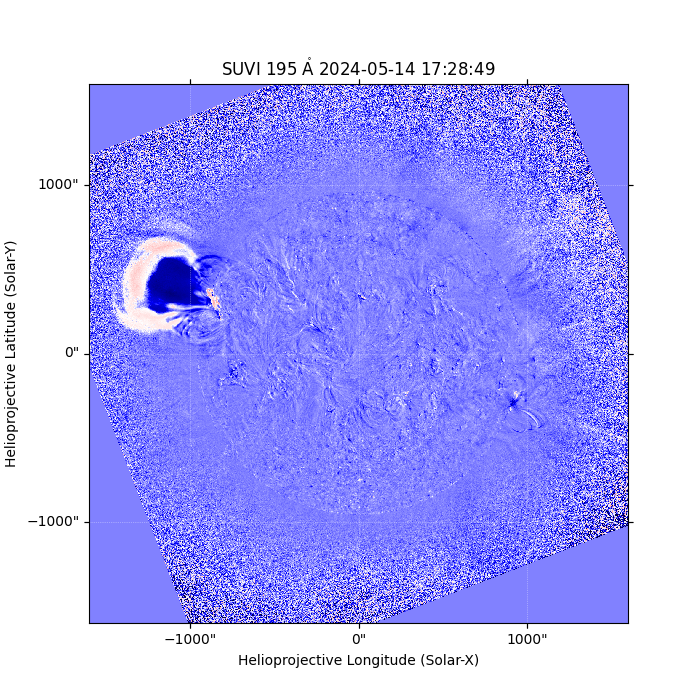

In [176]:
m = suvi_rgb[14]

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=m)
m.plot(axes=ax)#, cmap='seismic', vmin=0, vmax=5)
plt.show()

### Prep. the running-ratio from LASCO C2

In [158]:
m_seq_runratio_c2 = apply_runratio(clean_c2_maps)

for m in m_seq_runratio_c2:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=5, stretch=SqrtStretch())

print(len(m_seq_runratio_c2))

34


### Prep. the running-ratio from LASCO C3

In [159]:
m_seq_runratio_c3 = apply_runratio(clean_c3_maps)

for m in m_seq_runratio_c3:
    m.data[np.isnan(m.data)] = 1
    m.plot_settings['cmap'] = 'seismic'
    m.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=5, stretch=SqrtStretch())

print(len(m_seq_runratio_c3))

34


### Projecting SUVI RGB on C2 and C3

In [179]:
suvi_map = suvi_rgb[0]
lasco_c2_map = m_seq_runratio_c2[0]
lasco_c3_map = m_seq_runratio_c3[0]

projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c2_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c2_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)


projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=suvi_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(suvi_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(suvi_map.scale),
                                                 instrument=suvi_map.instrument,
                                                 wavelength=suvi_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(suvi_map.observer_coordinate):
    suvi_reprojected = suvi_map.reproject_to(projected_header)


projected_coord = SkyCoord(0*u.arcsec, 0*u.arcsec,
                           obstime=lasco_c3_map.observer_coordinate.obstime,
                           frame='helioprojective',
                           observer=lasco_c3_map.observer_coordinate,
                           rsun=lasco_c2_map.coordinate_frame.rsun)

projected_header = sunpy.map.make_fitswcs_header(lasco_c2_map.data.shape,
                                                 projected_coord,
                                                 scale=u.Quantity(lasco_c2_map.scale),
                                                 instrument=lasco_c2_map.instrument,
                                                 wavelength=lasco_c2_map.wavelength)

# We use `assume_spherical_screen` to ensure that the off limb pixels are reprojected
# otherwise it will only be the on disk pixels that are reprojected.
with Helioprojective.assume_spherical_screen(lasco_c2_map.observer_coordinate):
    lasco_c2_reprojected = lasco_c2_map.reproject_to(projected_header)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


<IPython.core.display.Javascript object>


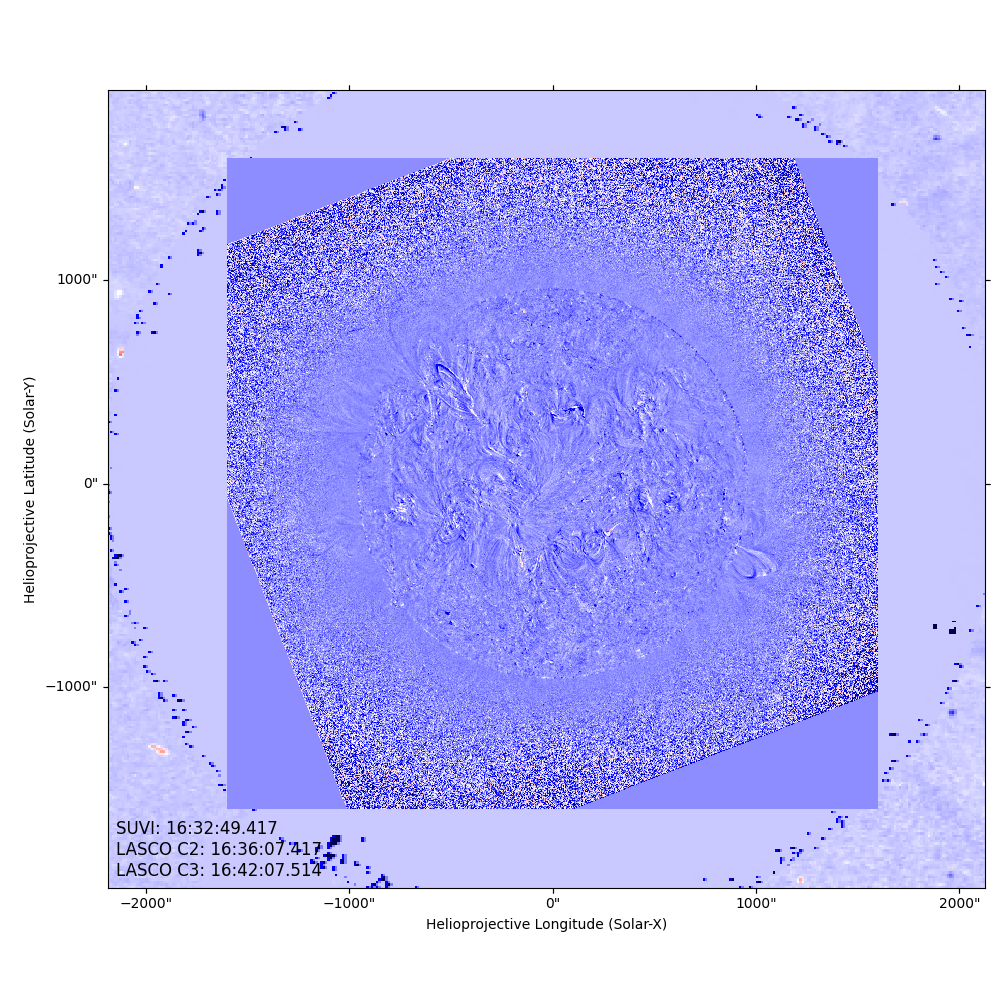

In [181]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection=lasco_c3_map)
lasco_c3_map.plot(axes=ax)
lasco_c2_reprojected.plot(axes=ax, autoalign=True)
suvi_reprojected.plot(axes=ax, autoalign=True)
ax.grid(False)
ax.set_title(' ')

# Define the title text
title_text = f"SUVI: {suvi_map.meta['date-obs'].split('T')[1]}\nLASCO C2: {lasco_c2_map.meta['time_obs']}\nLASCO C3: {lasco_c3_map.meta['time_obs']}"

# Add the title text to the bottom left of the plot
ax.text(0.01, 0.01, title_text, transform=ax.transAxes, color='black', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
fig.tight_layout()
plt.show()